In [1]:
install.packages("devtools", repos="https://cran.stat.unipd.it/")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘remotes’




In [2]:
devtools::install_github("sndmrc/BasketballAnalyzeR") 

hexbin       (NA     -> 1.28.1   ) [CRAN]
ggrepel      (NA     -> 0.8.1    ) [CRAN]
gridExtra    (NA     -> 2.3      ) [CRAN]
directlabels (NA     -> 2020.1.31) [CRAN]
corrplot     (NA     -> 0.84     ) [CRAN]
ggplotify    (NA     -> 0.0.4    ) [CRAN]
network      (NA     -> 1.16.0   ) [CRAN]
sna          (NA     -> 2.5      ) [CRAN]
dendextend   (NA     -> 1.13.3   ) [CRAN]
circlize     (NA     -> 0.4.8    ) [CRAN]
PBSmapping   (NA     -> 2.72.1   ) [CRAN]
sp           (NA     -> 1.4-0    ) [CRAN]
operators    (NA     -> 0.1-8    ) [CRAN]
GGally       (NA     -> 1.4.0    ) [CRAN]
statnet.c... (NA     -> 4.3.0    ) [CRAN]
ggnetwork    (NA     -> 0.5.8    ) [CRAN]
stringi      (1.4.5  -> 1.4.6    ) [CRAN]
farver       (2.0.1  -> 2.0.3    ) [CRAN]
vctrs        (0.2.2  -> 0.2.3    ) [CRAN]
digest       (0.6.23 -> 0.6.25   ) [CRAN]
BiocManager  (NA     -> 1.30.10  ) [CRAN]
coda         (NA     -> 0.19-3   ) [CRAN]
quadprog     (NA     -> 1.5-8    ) [CRAN]
gridGraphics (NA     -> 0.4-1    )

Installing 30 packages: hexbin, ggrepel, gridExtra, directlabels, corrplot, ggplotify, network, sna, dendextend, circlize, PBSmapping, sp, operators, GGally, statnet.common, ggnetwork, stringi, farver, vctrs, digest, BiocManager, coda, quadprog, gridGraphics, rvcheck, viridis, GlobalOptions, shape, reshape, igraph

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpbMAUa1/remotes80922a7ee/sndmrc-BasketballAnalyzeR-340d500/DESCRIPTION’
─  preparing ‘BasketballAnalyzeR’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘BasketballAnalyzeR_0.3.3.tar.gz’ (1.2s)
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
 library(BasketballAnalyzeR)

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


If you want to reproduce the figures contained in the book of
Zuccolotto and Manisera (2020) and
if the version of your R machine is >= 3.6.0, you need to type
RNGkind(sample.kind = "Rounding")
at the beginning of your working session




shtchr> PbP <- PbPmanipulation(PbP.BDB)

shtchr> subdata <- subset(PbP, player=="Kevin Durant")

shtchr> subdata$xx <- subdata$original_x/10

shtchr> subdata$yy <- subdata$original_y/10-41.75

shtchr> shotchart(data=subdata, x="xx", y="yy", scatter=TRUE)

shtchr> shotchart(data=subdata, x="xx", y="yy", scatter=TRUE, z="result")


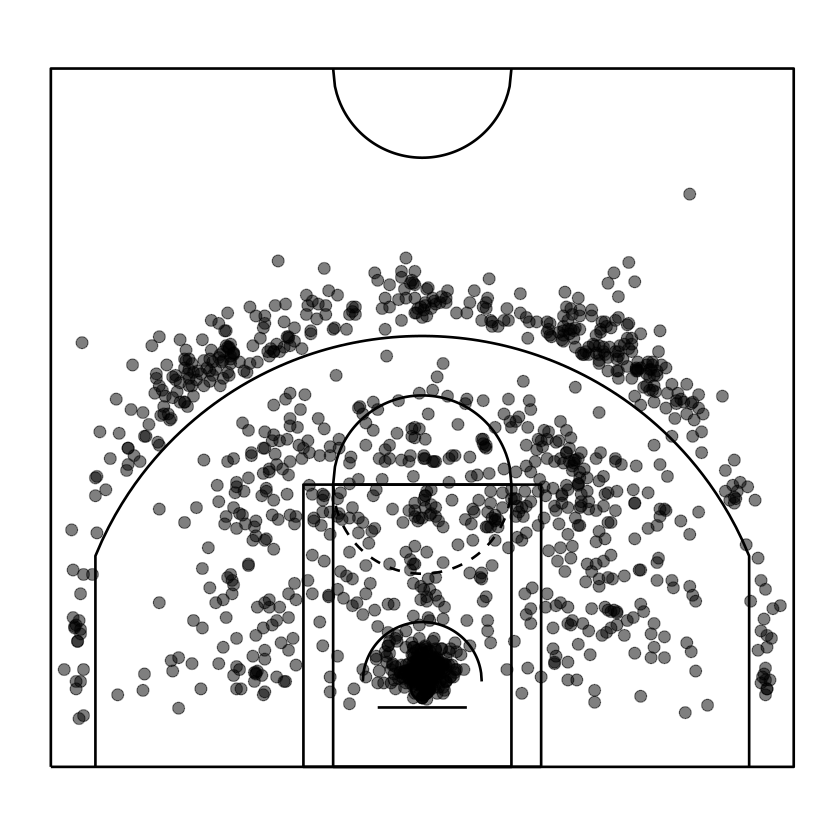


shtchr> shotchart(data=subdata, x="xx", y="yy", scatter=TRUE, z="result",
shtchr+           bg.col="black", courtline.col="white", palette="hot")


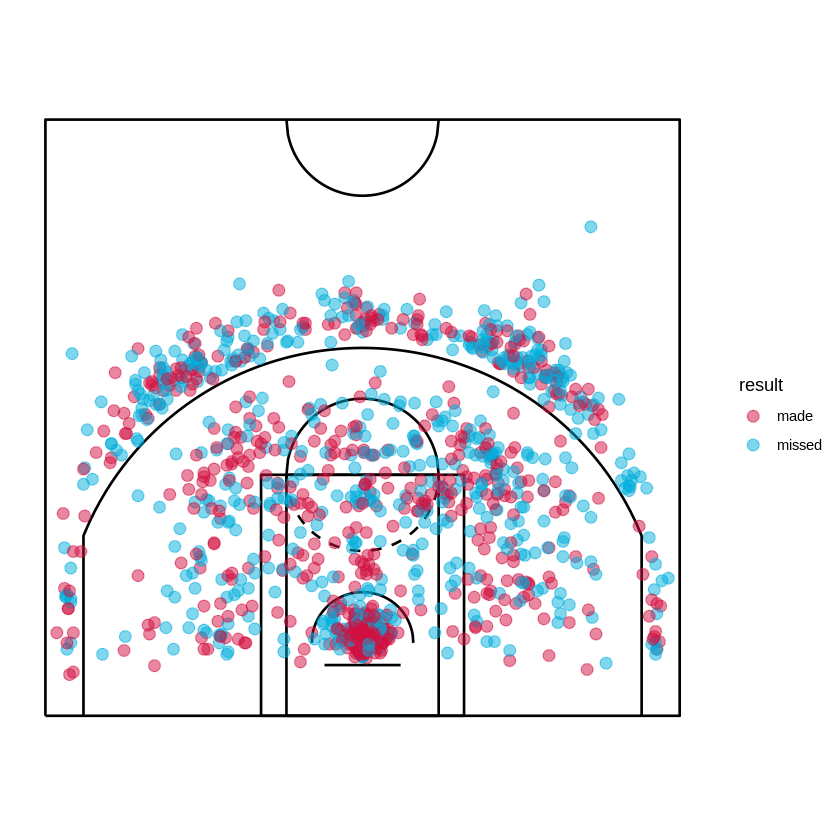


shtchr> shotchart(data=subdata, x="xx", y="yy", result="result",
shtchr+           type="sectors", sectline.col="gray", text.col="red")


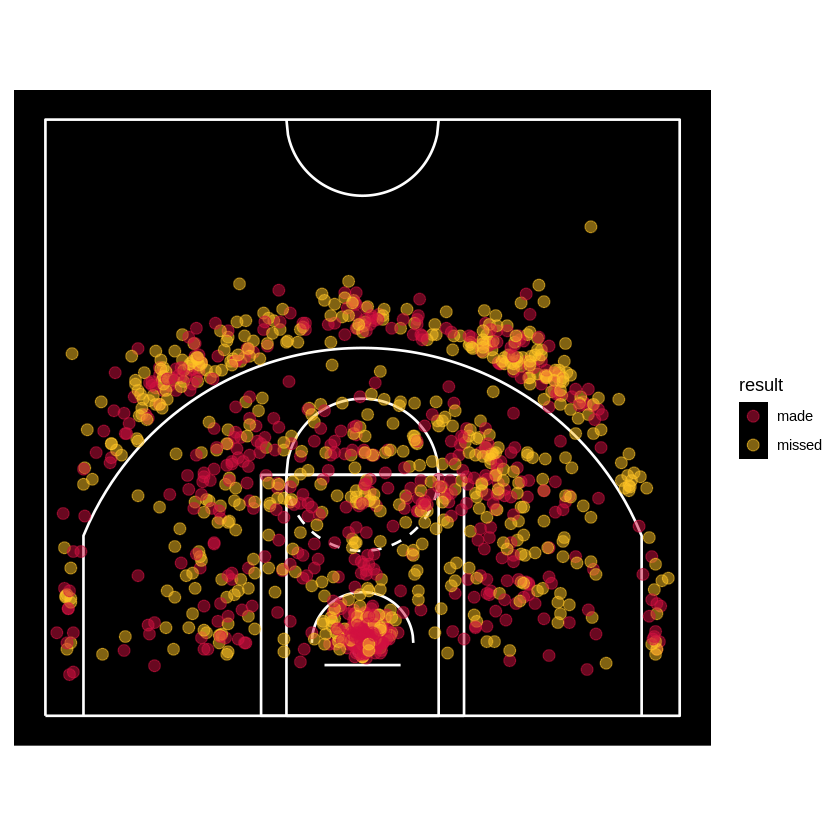


shtchr> shotchart(data=subdata, x="xx", y="yy", z="playlength", result="result",
shtchr+           type="sectors",  num.sect=5)


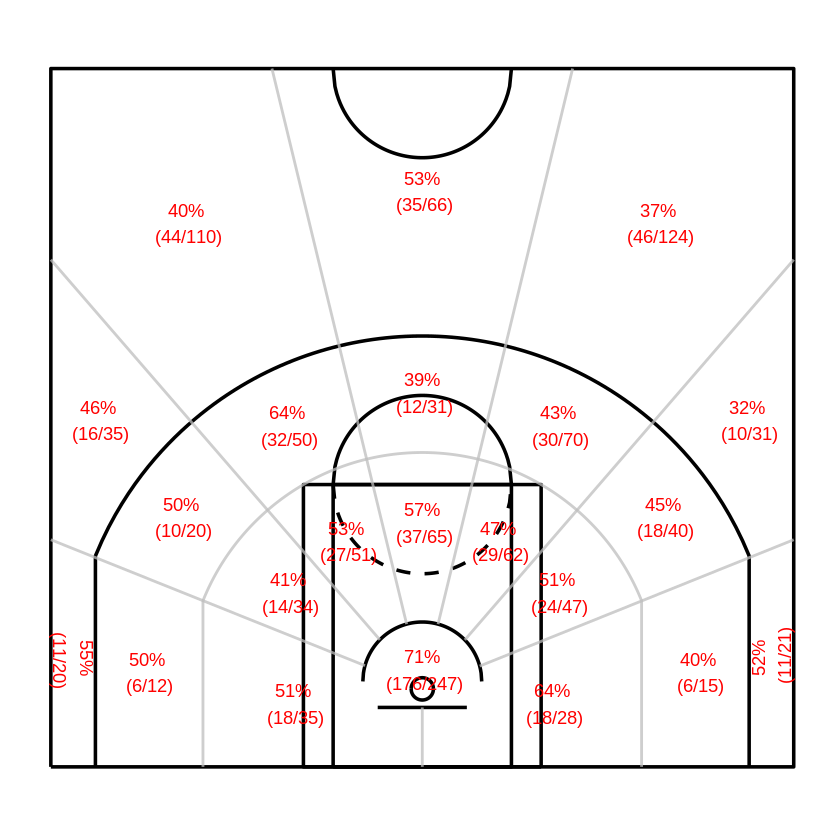


shtchr> shotchart(data=subdata, x="xx", y="yy", type="density-polygons", palette="bwr")


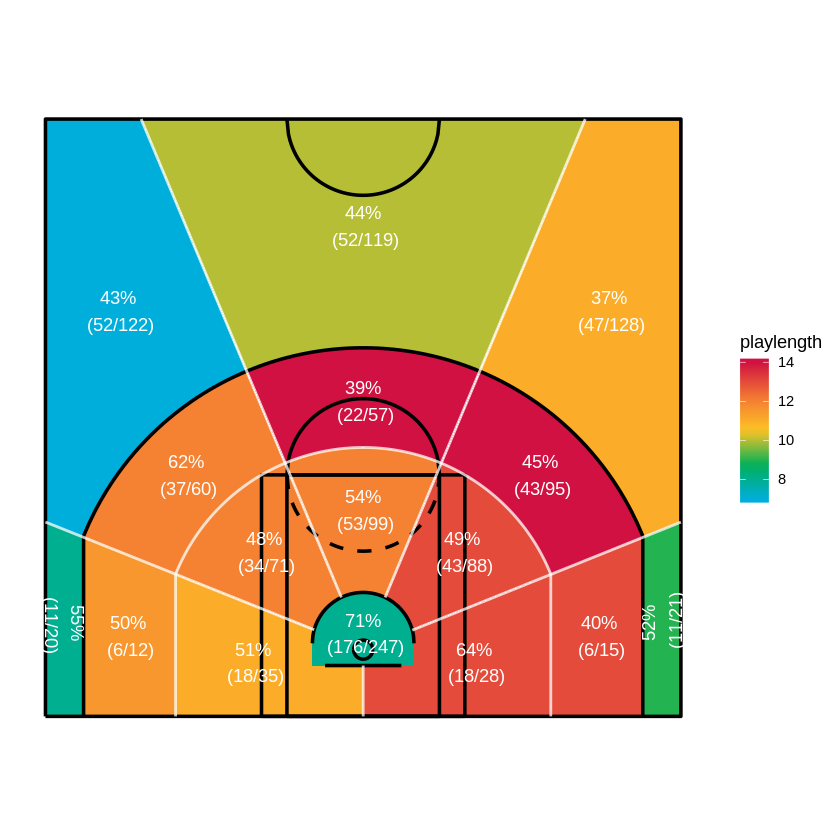


shtchr> shotchart(data=subdata, x="xx", y="yy", type="density-raster",
shtchr+           scatter=TRUE, pt.col="tomato", pt.alpha=0.1)


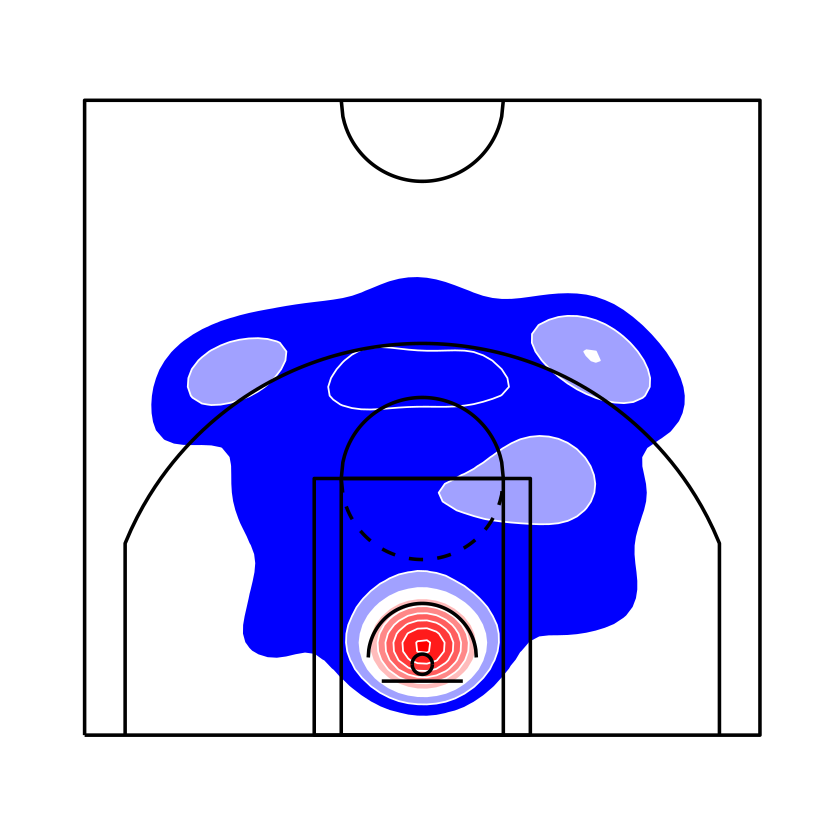


shtchr> shotchart(data=subdata, x="xx", y="yy", type="density-hexbin", nbins=30)


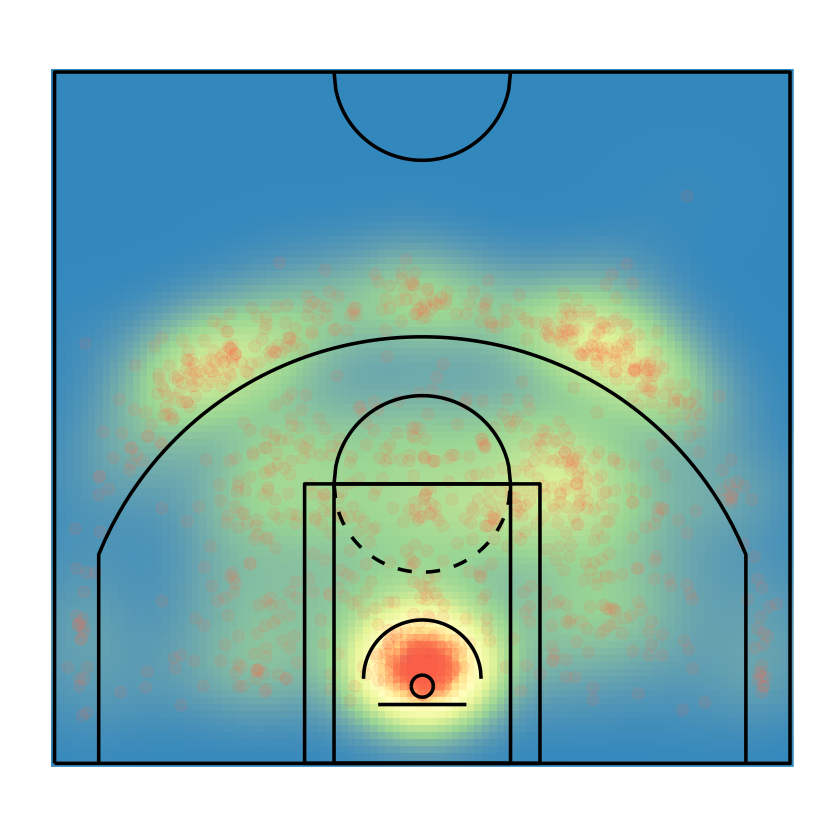

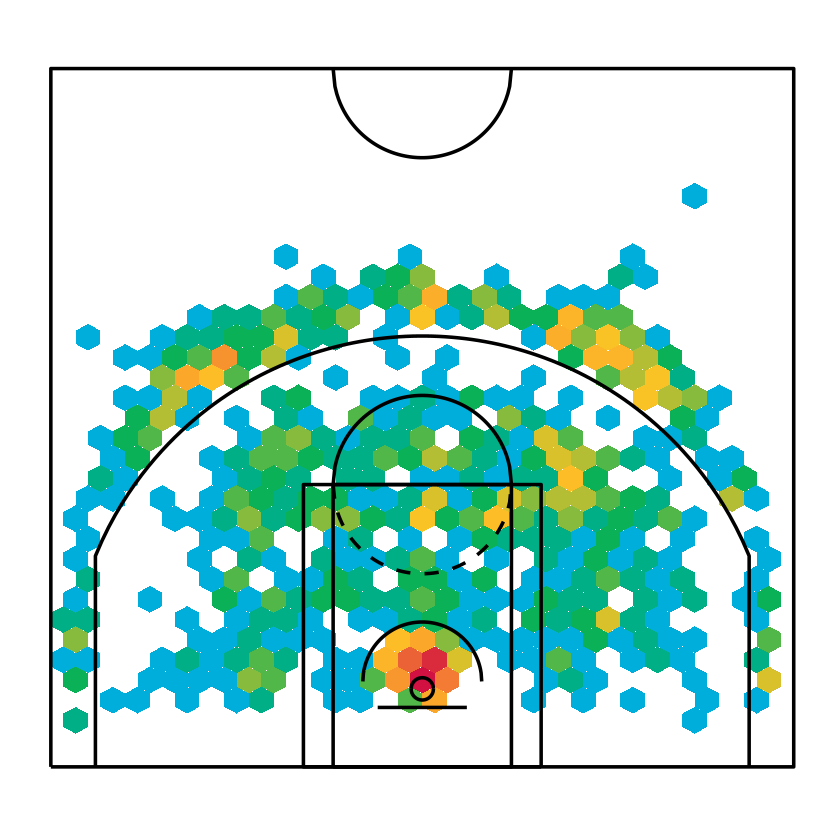

In [4]:
example(shotchart)

In [5]:
PbP <- PbPmanipulation(PbP.BDB)

function (data, x, y, z = NULL, z.fun = median, result = NULL, 
    type = NULL, scatter = FALSE, num.sect = 7, n = 1000, col.limits = c(NA, 
        NA), courtline.col = "black", bg.col = "white", sectline.col = "white", 
    text.col = "white", legend = FALSE, drop.levels = TRUE, pt.col = "black", 
    pt.alpha = 0.5, nbins = 25, palette = "mixed") 
{
    if (num.sect < 4) {
        stop("The number of sectors 'num.sect' must be >=4")
    }
    if (n < 500) {
        stop("The number of points 'n' must be >=500")
    }
    fancy_scientific <- function(l) {
        l <- format(l, digits = 3, scientific = TRUE)
        l <- gsub("^(.*)e", "'\\1'e", l)
        l <- gsub("e", "%*%10^", l)
        parse(text = l)
    }
    X <- Y <- angle <- nsegm <- sector <- ..density.. <- ..level.. <- NULL
    pal <- BbA_pal(palette = palette)
    df1 <- data.frame(x = data[, x], y = data[, y], z = data[, 
        z], result = data[, result])
    filt.na <- !apply(df1, 1, function(x) any(is.na(x)))
    df1 <- subset(df1, filt.na & y <= 0)
    list_sects <- generateSectors(num.sect, npts = n)
    sects <- list_sects[[1]]
    if (is.null(type) & !scatter) {
        p <- ggplot(data = data.frame(x = 0, y = 0), aes(x, y))
        p <- drawNBAcourt(p, full = FALSE, size = 0.75, col = courtline.col) + 
            coord_fixed() + themeBbA(plot.bgcolor = bg.col, legend.bgcolor = bg.col)
    }
    else if (is.null(type) & scatter) {
        p <- ggplot(data = data.frame(x = 0, y = 0), aes(x, y))
        p <- drawNBAcourt(p, full = FALSE, size = 0.75, col = courtline.col)
        if (is.null(z)) {
            p <- p + geom_point(data = df1, aes(x = x, y = y), 
                fill = pt.col, color = pt.col, alpha = pt.alpha, 
                shape = 21, size = 3, inherit.aes = FALSE)
        }
        else {
            p <- p + geom_point(data = df1, aes(x = x, y = y, 
                fill = z, color = z), alpha = pt.alpha, shape = 21, 
                size = 3, inherit.aes = FALSE)
            zvar <- df1$z
            if (is.factor(zvar)) {
                if (drop.levels) {
                  ncols <- length(unique(droplevels(zvar)))
                  cols <- rev(pal(ncols))
                  p <- p + scale_fill_manual(name = z, values = cols, 
                    drop = TRUE) + scale_color_manual(name = z, 
                    values = cols, drop = TRUE)
                }
                else {
                  ncols <- length(table(zvar))
                  cols <- rev(pal(ncols))
                  p <- p + scale_fill_manual(name = z, values = cols, 
                    drop = FALSE) + scale_color_manual(name = z, 
                    values = cols, drop = FALSE)
                }
            }
            else {
                p <- p + scale_fill_gradientn(name = z, colours = pal(256), 
                  limits = col.limits) + scale_color_gradientn(name = z, 
                  colours = pal(256), limits = col.limits)
            }
        }
        p <- p + coord_fixed() + themeBbA(plot.bgcolor = bg.col, 
            legend.bgcolor = bg.col)
    }
    else if (type == "sectors") {
        stats_by_sect <- sapply(sort(unique(sects$sector)), function(k) {
            sectk <- subset(sects, sector == k)
            filtk <- sp::point.in.polygon(point.x = df1$x, point.y = df1$y, 
                pol.x = sectk$x, pol.y = sectk$y) == 1
            mnk <- if (!is.null(z)) 
                z.fun(df1$z[filtk], na.rm = T)
            else NA
            totk <- sum(filtk)
            madek <- sum(df1$result[filtk] == "made")
            pctk <- round(100 * madek/totk)
            c(mnk, madek, totk, pctk)
        })
        sects$z <- stats_by_sect[1, ][sects$sector + 1]
        sects$pos <- unlist(sapply(unique(sects$sector), function(k) {
            x <- subset(sects, sector == k)
            return(1:nrow(x))
        }))
        s <- PBSmapping::as.PolySet(data.frame(X = sects$x, Y = sects$y, 
            POS = sects$pos, PID = sects$sector))
        c

In [0]:
tm <- c("BOS", "CLE", "GSW", "HOU")
selTeams <- which(Tadd$team %in% tm)
FF.sel <- fourfactors(Tbox[selTeams,], Obox[selTeams,])

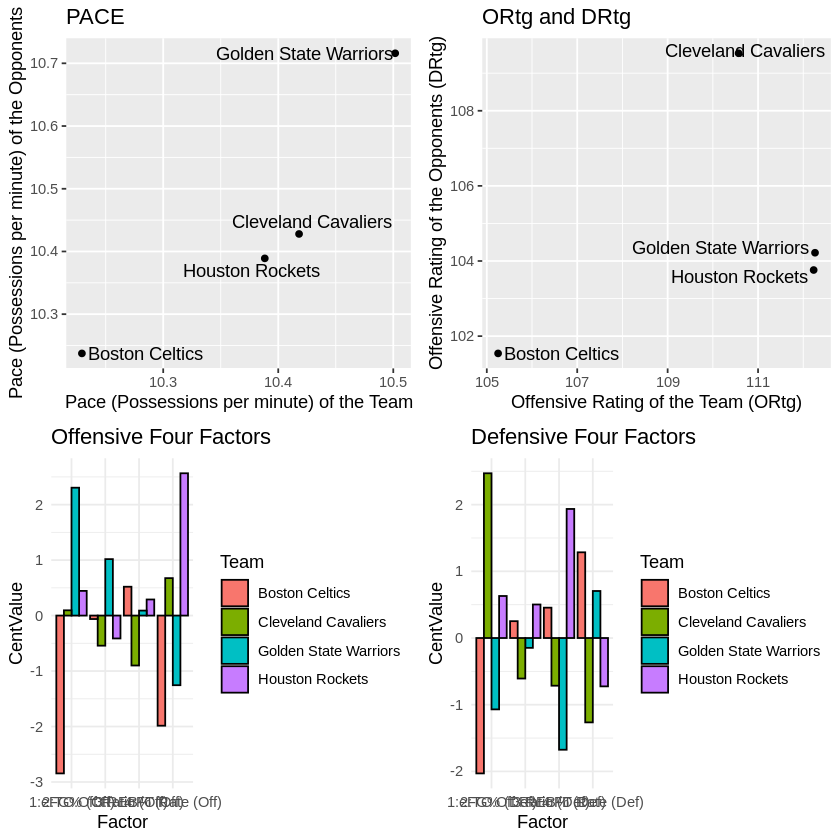

In [13]:
plot(FF.sel)